In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj

In [3]:
%matplotlib qt
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, histology, ccf
from pipeline.plot import histology_plot

Connecting root@127.0.0.1:3306


In [4]:
experiment.Session & ephys.Unit

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
435884,1,2018-12-07,daveliu,RRig


In [5]:
session_keys = experiment.Session.fetch('KEY')

In [6]:
session_key = session_keys[0]

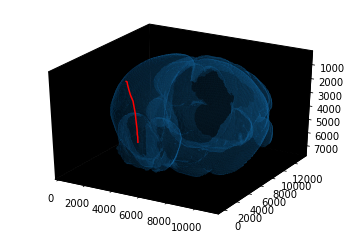

In [11]:
histology_plot.plot_probe_tracks(session_key)

In [10]:
import importlib
importlib.reload(histology_plot)

<module 'pipeline.plot.histology_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\histology_plot.py'>